# NEURAL NETWORKS AND DEEP LEARNING <br> PHYSICS OF DATA - Department of Physics and Astronomy  <br>  A.A. 2019/20 (6 CFU) <br> Student: Matteo Guida


## Environment Structure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
from importlib import reload
import time
from tqdm import trange
from Agent import training 
import Agent,Environment
warnings.filterwarnings("ignore")
reload(Agent)
reload(Environment);
import Agent,Environment

In [2]:
episodes = 3000        
episode_length = 50    
x = 10                 
y = 10                 
goal = [0, 7]          
discount = 0.9     
initial=[9,9]

walls = [
    [8,9], [8,8], [9,5], [8,5], [6,2], [6,3], [6,4], [6,5], [6,6], [6,7], [4,1], [4,2], [4,3], [4,4],
    [4,5]
]
sands = [
    [6,0], [6,1], [4,6], [4,7], [4,9], [3,6], [3,7],
    [3,9], [2,0], [2,1], [2,2], [2,3], [1,0], [1,1], [1,2], [1,3], [1,4],
    [1,5], [1,8]
]

## Linear and Exponential $\epsilon$ Schedule

In [3]:
def epsilon_schedule(exponential=False,epsilon_start = 0.85, epsilon_end = 0.01,T_eps=5,episodes=3000):
    if exponential is True:
        epsilon = np.empty(episodes)
        for i in range(episodes):
            epsilon[i] = epsilon_end + (epsilon_start - epsilon_end)*np.exp(-T_eps*i/episodes)
    else: 
        epsilon = np.linspace(epsilon_start,epsilon_end,episodes)
    return epsilon

In [4]:
alpha = 0.5
epsilon_start = 0.85; epsilon_end = 0.01

In [5]:
alpha = np.ones(episodes) * alpha
epsilon_linear = epsilon_schedule(exponential=False)
epsilon_exp = epsilon_schedule(exponential=True)

In [6]:
iterations = 50

lin_qlearning_eps_greedy_reward_matrix = np.zeros(shape=(iterations,episodes))
lin_qlearning_softmax_reward_matrix = np.zeros(shape=(iterations,episodes))
lin_sarsa_eps_greedy_reward_matrix = np.zeros(shape=(iterations,episodes))
lin_sarsa_softmax_reward_matrix = np.zeros(shape=(iterations,episodes))

In [ ]:
policies_list = [[False,False],[True,False],[False,True],[True,True]]
string_policies_list= ["qlearning_eps_greedy_","qlearning_softmax_","sarsa_eps_greedy_","sarsa_softmax_"]

for policies,list0 in zip(policies_list,string_policies_list):
    for iteration in trange(iterations):
        learner = Agent.Agent(states=(x * y), actions=5, discount=discount, max_reward=1, softmax=policies[0], sarsa=policies[1])
        reward_list = training(agent=learner, x=x , y=y, goal=goal, alpha_array=alpha, 
                               epsilon_array=epsilon_linear, episodes=episodes, initial=initial,walls=walls,sands=sands,plot_maze=[True,list0])
        eval("lin_"+list0+"reward_matrix")[iteration] = reward_list
    
    

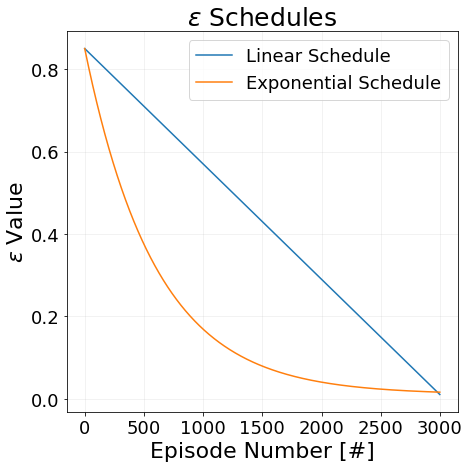

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(epsilon_linear, label='Linear Schedule')
ax.plot(epsilon_exp, label='Exponential Schedule')
ax.set_ylabel(r"$\epsilon$ Value",fontsize=22)
ax.set_xlabel("Episode Number [#]",fontsize=22)
ax.set_title('$\epsilon$ Schedules',fontsize=25)
ax.tick_params(labelsize=18)
ax.legend(fontsize=18)
ax.grid(alpha=0.2)

plt.savefig('./plots/epsilon_schedules.png',bbox_inches="tight")

plt.show()

In [ ]:
exp_qlearning_eps_greedy_reward_matrix = np.zeros(shape=(iterations,episodes))
exp_qlearning_softmax_reward_matrix = np.zeros(shape=(iterations,episodes))
exp_sarsa_eps_greedy_reward_matrix = np.zeros(shape=(iterations,episodes))
exp_sarsa_softmax_reward_matrix = np.zeros(shape=(iterations,episodes))

In [ ]:
policies_list = [[False,False],[True,False],[False,True],[True,True]]
string_policies_list= ["qlearning_eps_greedy_","qlearning_softmax_","sarsa_eps_greedy_","sarsa_softmax_"]

for policies,list0 in zip(policies_list,string_policies_list):
    for iteration in trange(iterations):
        learner = Agent.Agent(states=(x * y), actions=5, discount=discount, max_reward=1, softmax=policies[0], sarsa=policies[1])
        reward_list = training(agent=learner, x=x , y=y, goal=goal, alpha_array=alpha, 
                               epsilon_array=epsilon_exp, episodes=episodes, initial=initial,walls=walls,sands=sands,plot_maze=[True,list0])
        eval("exp_"+list0+"reward_matrix")[iteration] = reward_list
    
    

In [ ]:
all_rewards_lin = [lin_qlearning_eps_greedy_reward_matrix.mean(axis=0), lin_qlearning_softmax_reward_matrix.mean(axis=0),
               lin_sarsa_eps_greedy_reward_matrix.mean(axis=0),lin_sarsa_softmax_reward_matrix.mean(axis=0)]

all_rewards_exp = [exp_qlearning_eps_greedy_reward_matrix.mean(axis=0), exp_qlearning_softmax_reward_matrix.mean(axis=0),
               exp_sarsa_eps_greedy_reward_matrix.mean(axis=0),exp_sarsa_softmax_reward_matrix.mean(axis=0)]

In [9]:
with open('./results/linear_schedule_rewards.data', "rb") as input_file:
    linear_load_rewards = pickle.load(input_file)
with open('./results/exp_schedule_rewards.data', "rb") as input_file:
    exp_load_rewards = pickle.load(input_file)

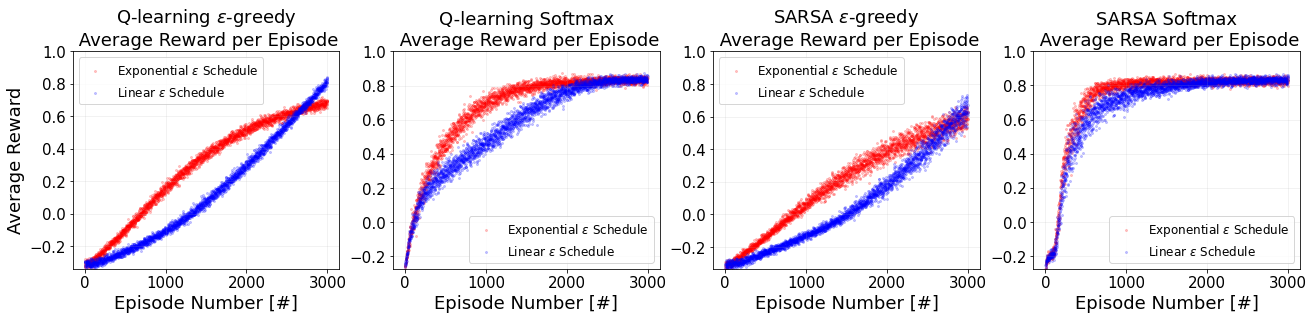

In [10]:
plot_titles = ["Q-learning $\epsilon$-greedy","Q-learning Softmax","SARSA $\epsilon$-greedy"
               ,"SARSA Softmax"]

exp_list_join= list(zip(exp_load_rewards,linear_load_rewards,plot_titles))

fig, ax = plt.subplots(1,4, figsize=(22,4))

for i,list_rew in enumerate(exp_list_join):
    ax[i].scatter(range(len(list_rew[0].flatten())),list_rew[0].flatten(),color='r',s=4,alpha=0.2,label=r"Exponential $\epsilon$ Schedule")
    ax[i].scatter(range(len(list_rew[1].flatten())),list_rew[1].flatten(),color='b',s=4,alpha=0.2,label=r"Linear $\epsilon$ Schedule")
    ax[i].set_title(list_rew[2]+'\n Average Reward per Episode' ,fontsize=18)
    ax[i].set_xlabel("Episode Number [#]",fontsize=18)
    ax[i].tick_params(labelsize=15)
    ax[i].grid(alpha=0.2)
    ax[i].legend(fontsize=12)
    ax[i].set_ylim([min(list_rew[0].flatten()), 1])
ax[0].set_ylabel("Average Reward",fontsize=18)
    
plt.savefig('./plots/reward.png',bbox_inches="tight")
plt.show() 